In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../')

[I] m            : 300
[I] n            : 500
[I] k            : 5
[I] overlap      : 4
[I] seed         : 1000


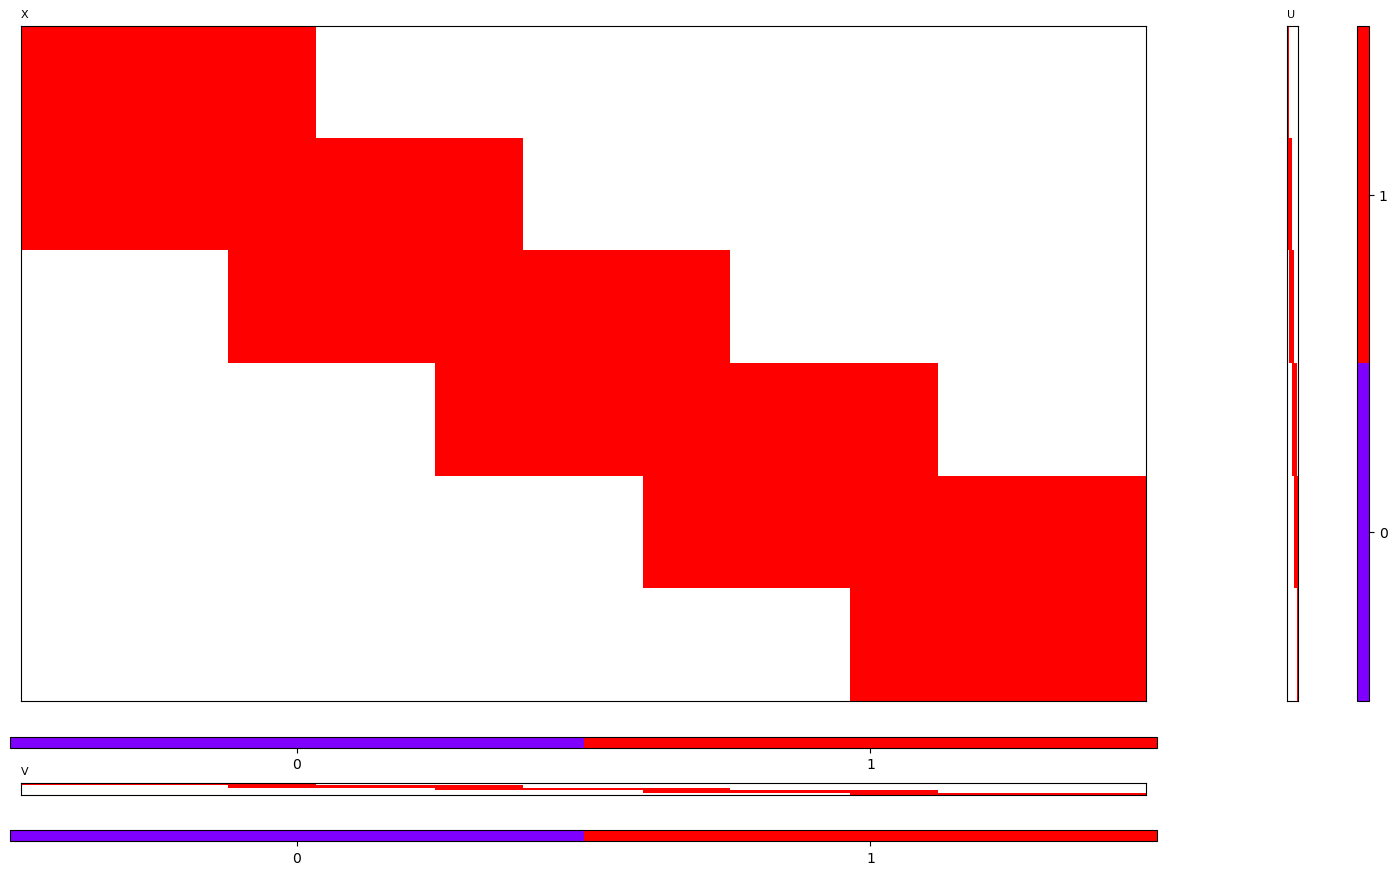

<Figure size 640x480 with 0 Axes>

In [25]:
from generators import BlockDiagonalMatrixGenerator

data = BlockDiagonalMatrixGenerator(m=300, n=500, k=5, overlap=[0.5, 0.3, 0.5, 0.3])
data.generate(seed=1000)
# data.add_noise(noise=[0.4, 0.1], seed=2000)
# tau = 0.3
data.show_matrix()

In [3]:
data.U

<300x5 sparse matrix of type '<class 'numpy.float64'>'
	with 500 stored elements in Compressed Sparse Row format>

In [4]:
data.V

<500x5 sparse matrix of type '<class 'numpy.float64'>'
	with 544 stored elements in Compressed Sparse Row format>

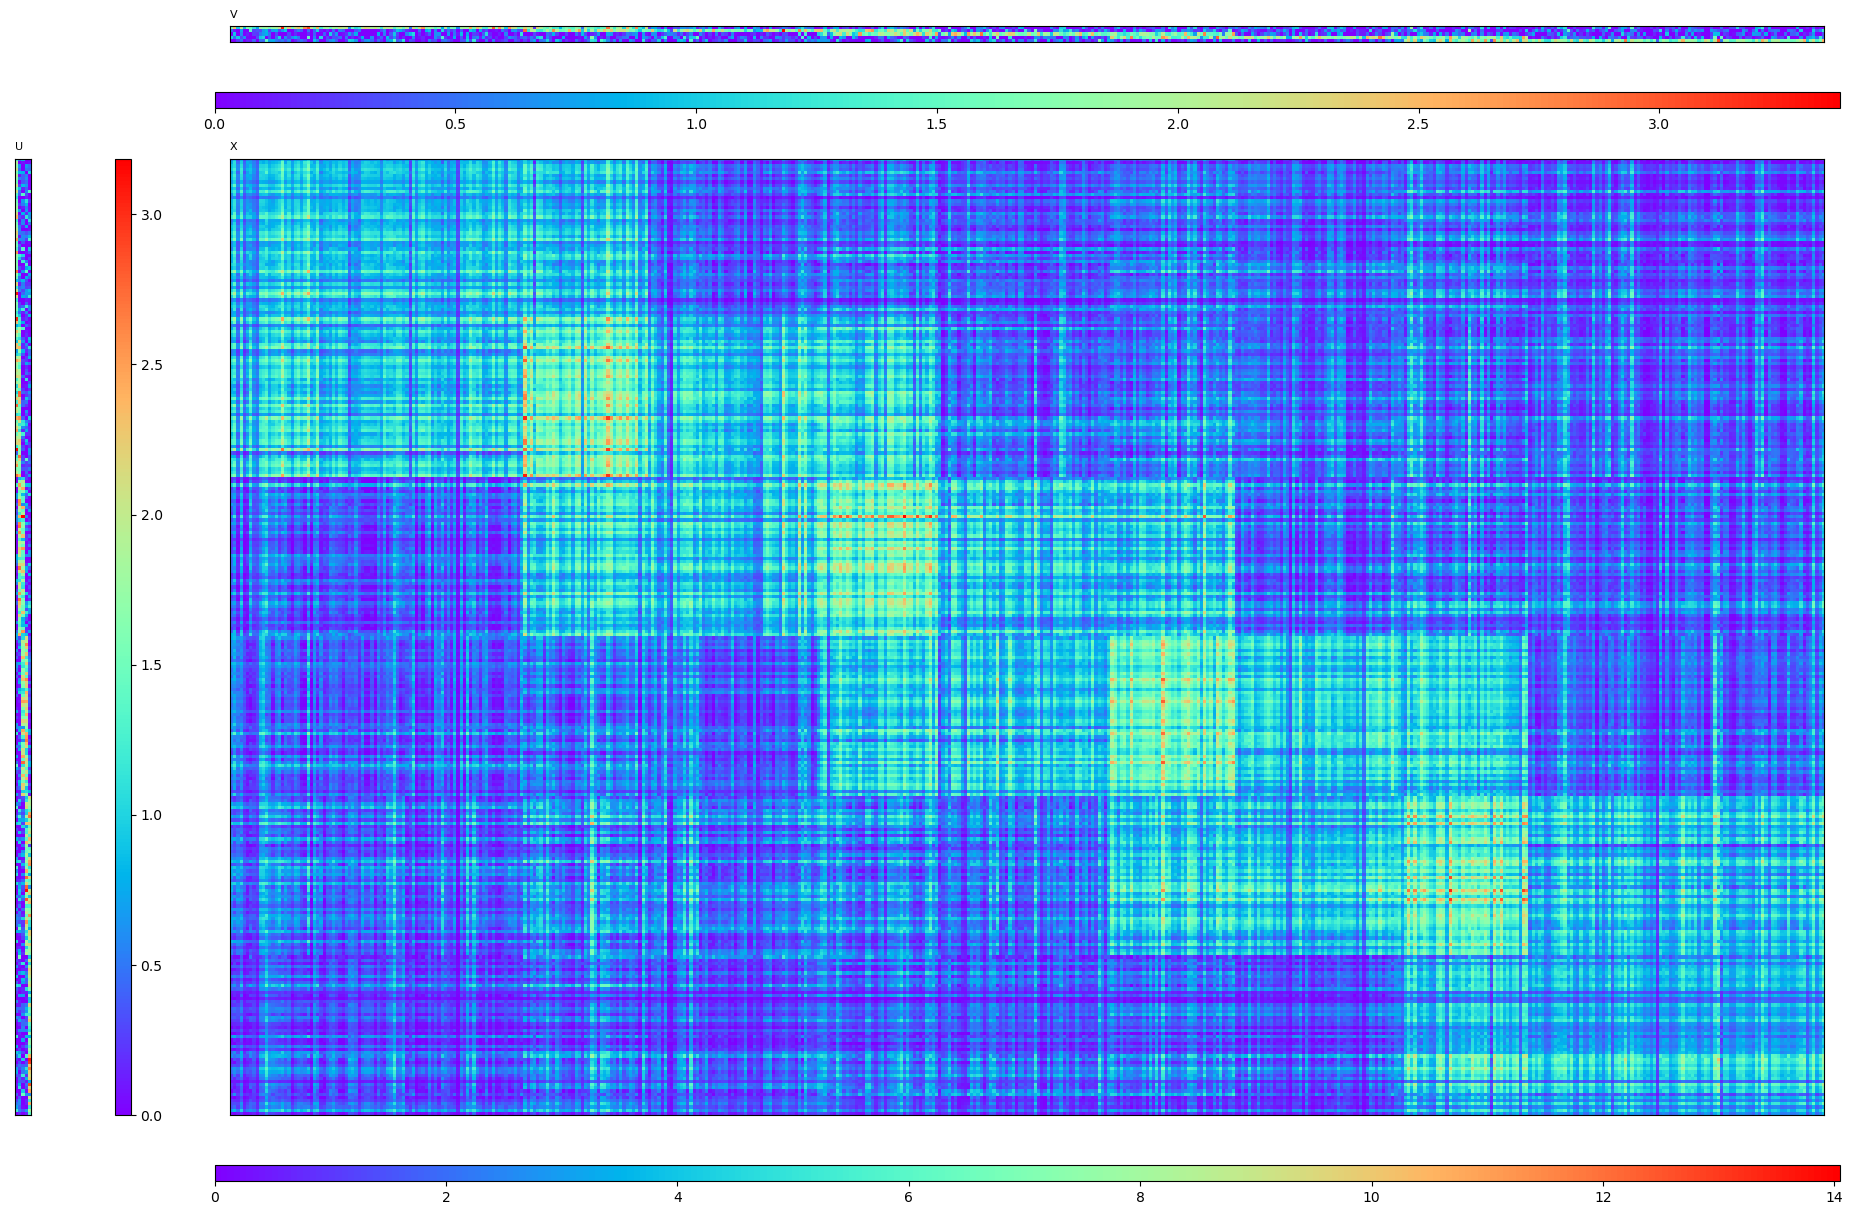

<Figure size 640x480 with 0 Axes>

In [26]:
# generate NMF matrix

import numpy as np
from utils import to_dense, get_rng, show_matrix

def generate_nmf_matrix(data, U_mu_0, U_sigma_0, U_mu_1, U_sigma_1, V_mu_0, V_sigma_0, V_mu_1, V_sigma_1, seed=1000):
    U, V = to_dense(data.U), to_dense(data.V)
    rng = np.random.RandomState(seed)

    for k in range(U.shape[1]):
        for i in range(U.shape[0]):
            if U[i, k] == 0:
                U[i, k] = rng.normal(loc=U_mu_0, scale=U_sigma_0, size=1)
            else:
                U[i, k] = rng.normal(loc=U_mu_1, scale=U_sigma_1, size=1)
            if U[i, k] < 0:
                U[i, k] = 0

    for k in range(V.shape[1]):
        for i in range(V.shape[0]):
            if V[i, k] == 0:
                V[i, k] = rng.normal(loc=V_mu_0, scale=V_sigma_0, size=1)
            else:
                V[i, k] = rng.normal(loc=V_mu_1, scale=V_sigma_1, size=1)
            if V[i, k] < 0:
                V[i, k] = 0

    X = U @ V.T
    
    return X, U, V

bias_0, bias_1, sigma_0, sigma_1 = 0.25, 1.75, 0.5, 0.5
U_mu_0, U_sigma_0, U_mu_1, U_sigma_1 = bias_0, sigma_0, bias_1, sigma_1
V_mu_0, V_sigma_0, V_mu_1, V_sigma_1 = bias_0, sigma_0, bias_1, sigma_1

X, U, V = generate_nmf_matrix(data, U_mu_0, U_sigma_0, U_mu_1, U_sigma_1, V_mu_0, V_sigma_0, V_mu_1, V_sigma_1)

show_matrix([(X, [1, 1], 'X'), (U, [1, 0], 'U'), (V.T, [0, 1], 'V')], colorbar=True)

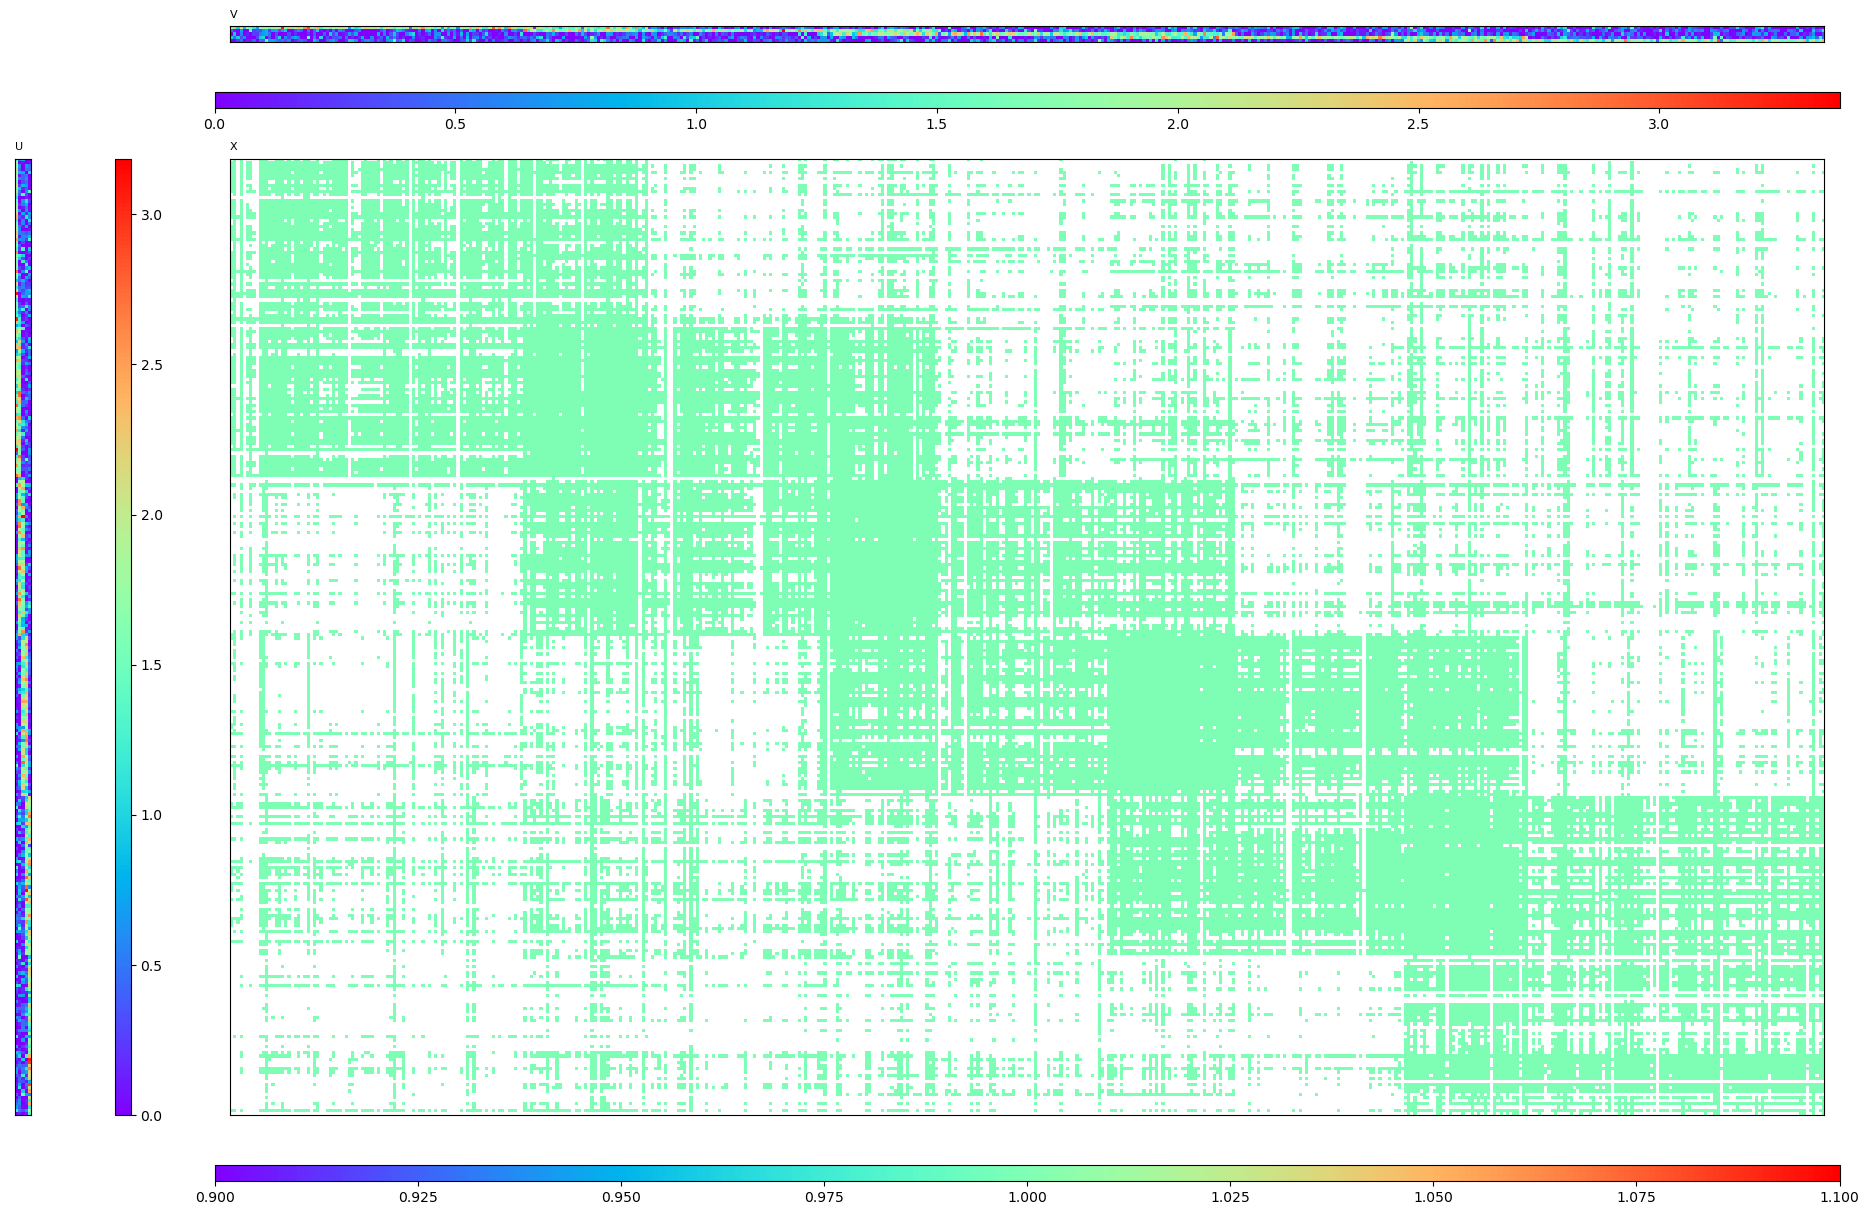

<Figure size 640x480 with 0 Axes>

In [40]:
from utils import binarize, to_sparse

X, U, V = generate_nmf_matrix(data, U_mu_0, U_sigma_0, U_mu_1, U_sigma_1, V_mu_0, V_sigma_0, V_mu_1, V_sigma_1)

X = binarize(X=X, threshold=3.)
X = to_sparse(X)
show_matrix([(X, [1, 1], 'X'), (U, [1, 0], 'U'), (V.T, [0, 1], 'V')], colorbar=True)

[I] NoSplit, sampling positives
[I] RatioSplit, sampling positives
[I]   seed         : 1718179240
[I]   train_size   : 62345
[I]   val_size     : 0
[I]   test_size    : 0
[I]   seed         : 1718179240
[I] tau          : 0.7
[I] k            : 5
[I] tol          : 0
[I] w_fp         : 0.6
[I] w_fn         : None
[I] verbose      : False
[I] display      : False
[I] task         : reconstruction
[I] verbose      : True
[I] display      : True
[I] Missing validation data.
[W] Missing testing data.


 60%|██████    | 3/5 [02:01<01:20, 40.34s/it]


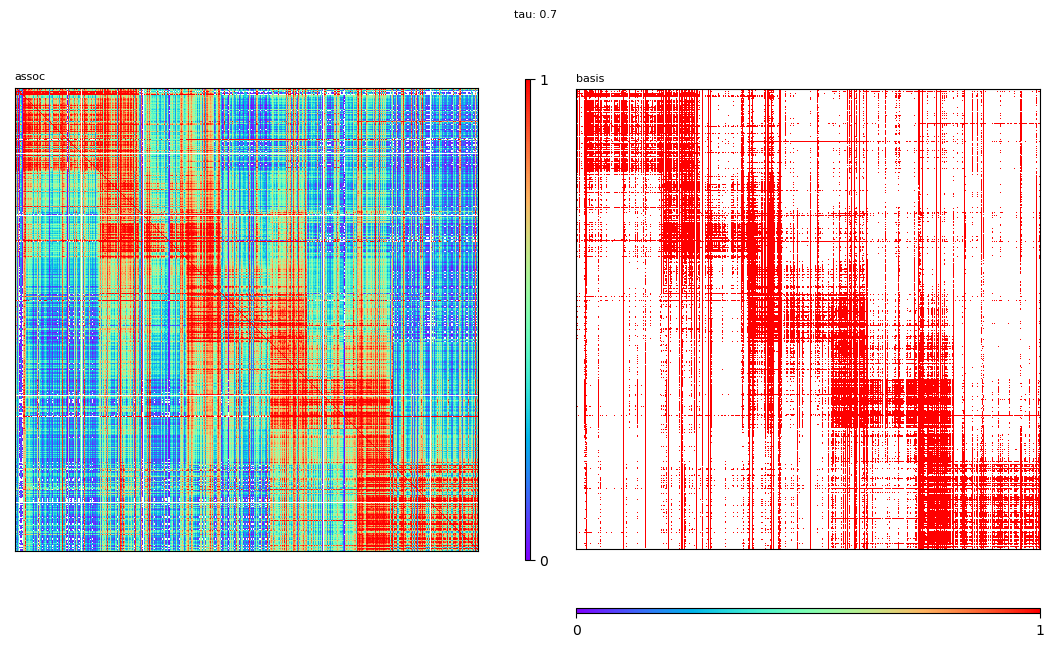

<Figure size 640x480 with 0 Axes>

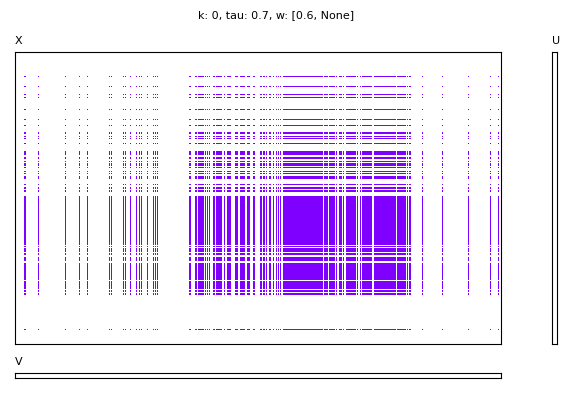

train                                        \
                              0                                         
                time  k   score score_0.5 desc_len       shape     TP   
0  12/06/24 04:00:44  0  5801.8    8221.0  46220.0  [128, 189]  20317   

                                                                       \
                                                                        
       TPR    FP       FPR     FN      FNR      ERR      ACC   Recall   
0  0.32588  3875  0.044207  42028  0.67412  0.30602  0.69398  0.32588   

                       
                       
  Precision        F1  
0  0.839823  0.469556

<Figure size 640x480 with 0 Axes>

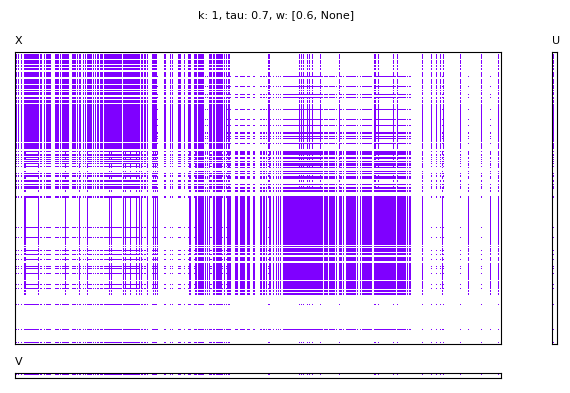

train                                        \
                               0                                         
                time  k    score score_0.5 desc_len       shape     TP   
0  12/06/24 04:00:44  0   5801.8    8221.0  46220.0  [128, 189]  20317   
1  12/06/24 04:00:47  1  10028.8   14212.5  34523.0  [117, 169]  35131   

                                                                            \
                                                                             
        TPR    FP       FPR     FN       FNR       ERR       ACC    Recall   
0  0.325880  3875  0.044207  42028  0.674120  0.306020  0.693980  0.325880   
1  0.563493  6706  0.076504  27214  0.436507  0.226133  0.773867  0.563493   

                       
                       
  Precision        F1  
0  0.839823  0.469556  
1  0.839711  0.674416

<Figure size 640x480 with 0 Axes>

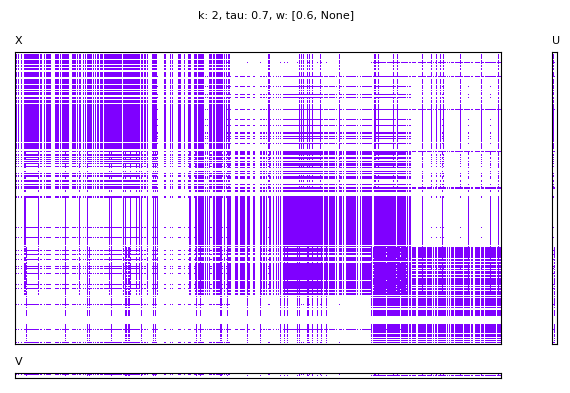

train                                        \
                               0                                         
                time  k    score score_0.5 desc_len       shape     TP   
0  12/06/24 04:00:44  0   5801.8    8221.0  46220.0  [128, 189]  20317   
1  12/06/24 04:00:47  1  10028.8   14212.5  34523.0  [117, 169]  35131   
2  12/06/24 04:00:50  2  12385.8   17403.5  28362.0   [78, 143]  42492   

                                                                            \
                                                                             
        TPR    FP       FPR     FN       FNR       ERR       ACC    Recall   
0  0.325880  3875  0.044207  42028  0.674120  0.306020  0.693980  0.325880   
1  0.563493  6706  0.076504  27214  0.436507  0.226133  0.773867  0.563493   
2  0.681562  7685  0.087673  19853  0.318438  0.183587  0.816413  0.681562   

                       
                       
  Precision        F1  
0  0.839823  0.469556  
1  0.839711  0.674416  
2  0.846842  0.755266

<Figure size 640x480 with 0 Axes>

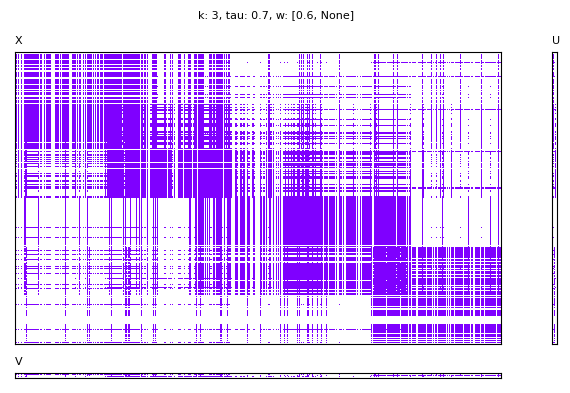

train                                        \
                               0                                         
                time  k    score score_0.5 desc_len       shape     TP   
0  12/06/24 04:00:44  0   5801.8    8221.0  46220.0  [128, 189]  20317   
1  12/06/24 04:00:47  1  10028.8   14212.5  34523.0  [117, 169]  35131   
2  12/06/24 04:00:50  2  12385.8   17403.5  28362.0   [78, 143]  42492   
3  12/06/24 04:00:53  3  13836.8   19489.5  24436.0   [71, 175]  47753   

                                                                            \
                                                                             
        TPR    FP       FPR     FN       FNR       ERR       ACC    Recall   
0  0.325880  3875  0.044207  42028  0.674120  0.306020  0.693980  0.325880   
1  0.563493  6706  0.076504  27214  0.436507  0.226133  0.773867  0.563493   
2  0.681562  7685  0.087673  19853  0.318438  0.183587  0.816413  0.681562   
3  0.765948  8774  0.100097  14592  0.234052  0.155773  0.844227  0.765948   

                       
                       
  Precision        F1  
0  0.839823  0.469556  
1  0.839711  0.674416  
2  0.846842  0.755266  
3  0.844782  0.803436

<Figure size 640x480 with 0 Axes>

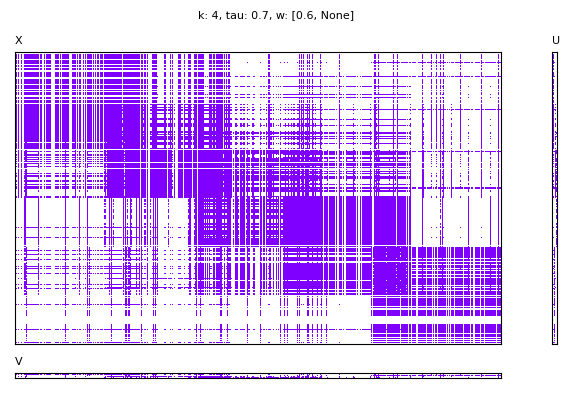

train                                        \
                               0                                         
                time  k    score score_0.5 desc_len       shape     TP   
0  12/06/24 04:00:44  0   5801.8    8221.0  46220.0  [128, 189]  20317   
1  12/06/24 04:00:47  1  10028.8   14212.5  34523.0  [117, 169]  35131   
2  12/06/24 04:00:50  2  12385.8   17403.5  28362.0   [78, 143]  42492   
3  12/06/24 04:00:53  3  13836.8   19489.5  24436.0   [71, 175]  47753   
4  12/06/24 04:00:56  4  14348.4   20226.5  23188.0   [65, 161]  49617   

                                                                            \
                                                                             
        TPR    FP       FPR     FN       FNR       ERR       ACC    Recall   
0  0.325880  3875  0.044207  42028  0.674120  0.306020  0.693980  0.325880   
1  0.563493  6706  0.076504  27214  0.436507  0.226133  0.773867  0.563493   
2  0.681562  7685  0.087673  19853  0.318438  0.183587  0.816413  0.681562   
3  0.765948  8774  0.100097  14592  0.234052  0.155773  0.844227  0.765948   
4  0.795846  9164  0.104546  12728  0.204154  0.145947  0.854053  0.795846   

                       
                       
  Precision        F1  
0  0.839823  0.469556  
1  0.839711  0.674416  
2  0.846842  0.755266  
3  0.844782  0.803436  
4  0.844099  0.819263

100%|██████████| 5/5 [00:14<00:00,  2.87s/it]

[W] Stopped in advance: Reach requested factor


train                                        \
                               0                                         
                time  k    score score_0.5 desc_len       shape     TP   
0  12/06/24 04:00:44  0   5801.8    8221.0  46220.0  [128, 189]  20317   
1  12/06/24 04:00:47  1  10028.8   14212.5  34523.0  [117, 169]  35131   
2  12/06/24 04:00:50  2  12385.8   17403.5  28362.0   [78, 143]  42492   
3  12/06/24 04:00:53  3  13836.8   19489.5  24436.0   [71, 175]  47753   
4  12/06/24 04:00:56  4  14348.4   20226.5  23188.0   [65, 161]  49617   

                                                                            \
                                                                             
        TPR    FP       FPR     FN       FNR       ERR       ACC    Recall   
0  0.325880  3875  0.044207  42028  0.674120  0.306020  0.693980  0.325880   
1  0.563493  6706  0.076504  27214  0.436507  0.226133  0.773867  0.563493   
2  0.681562  7685  0.087673  19853  0.318438  0.183587  0.816413  0.681562   
3  0.765948  8774  0.100097  14592  0.234052  0.155773  0.844227  0.765948   
4  0.795846  9164  0.104546  12728  0.204154  0.145947  0.854053  0.795846   

                       
                       
  Precision        F1  
0  0.839823  0.469556  
1  0.839711  0.674416  
2  0.846842  0.755266  
3  0.844782  0.803436  
4  0.844099  0.819263

<Figure size 640x480 with 0 Axes>

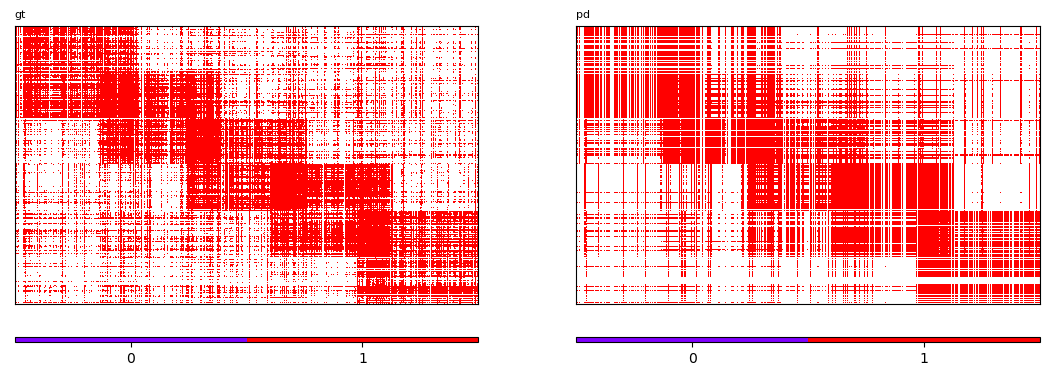

[I] model saved as: 24-06-12_16-00-56_Asso.pickle


<Figure size 640x480 with 0 Axes>

In [42]:
from models import Asso
from datasets import RatioSplit, NoSplit

# split = RatioSplit(X=data.X, val_size=0.1, test_size=0.2, seed=1997)
split = NoSplit(X=X)

k = 5
tau = 0.7
w_fp = 0.6

X_train, X_val, X_test = split.X_train, split.X_val, split.X_test

model = Asso(k=k, tau=tau, w_fp=w_fp)
model.fit(X_train=X_train, X_val=None, X_test=None, task='reconstruction', verbose=True, display=True)

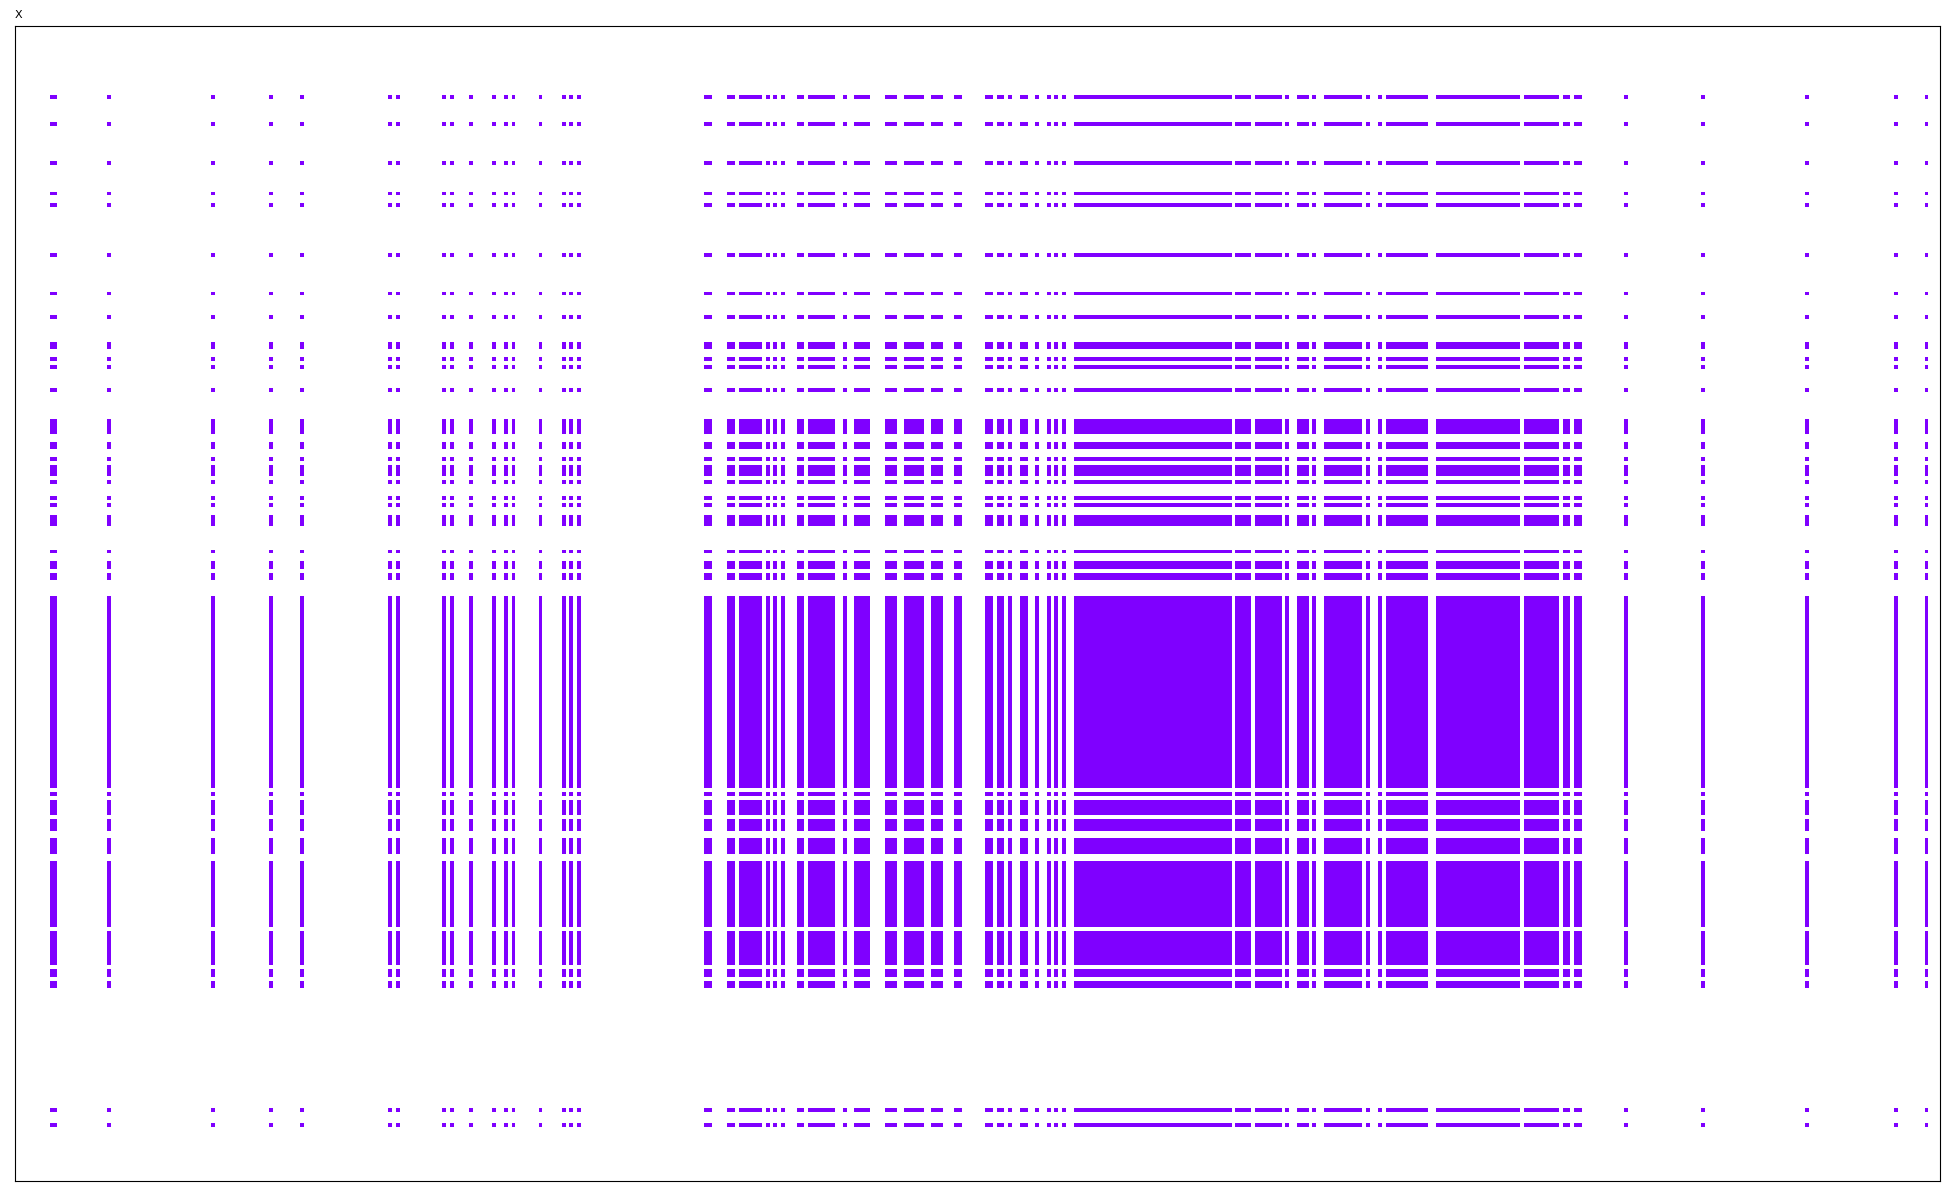

<Figure size 640x480 with 0 Axes>

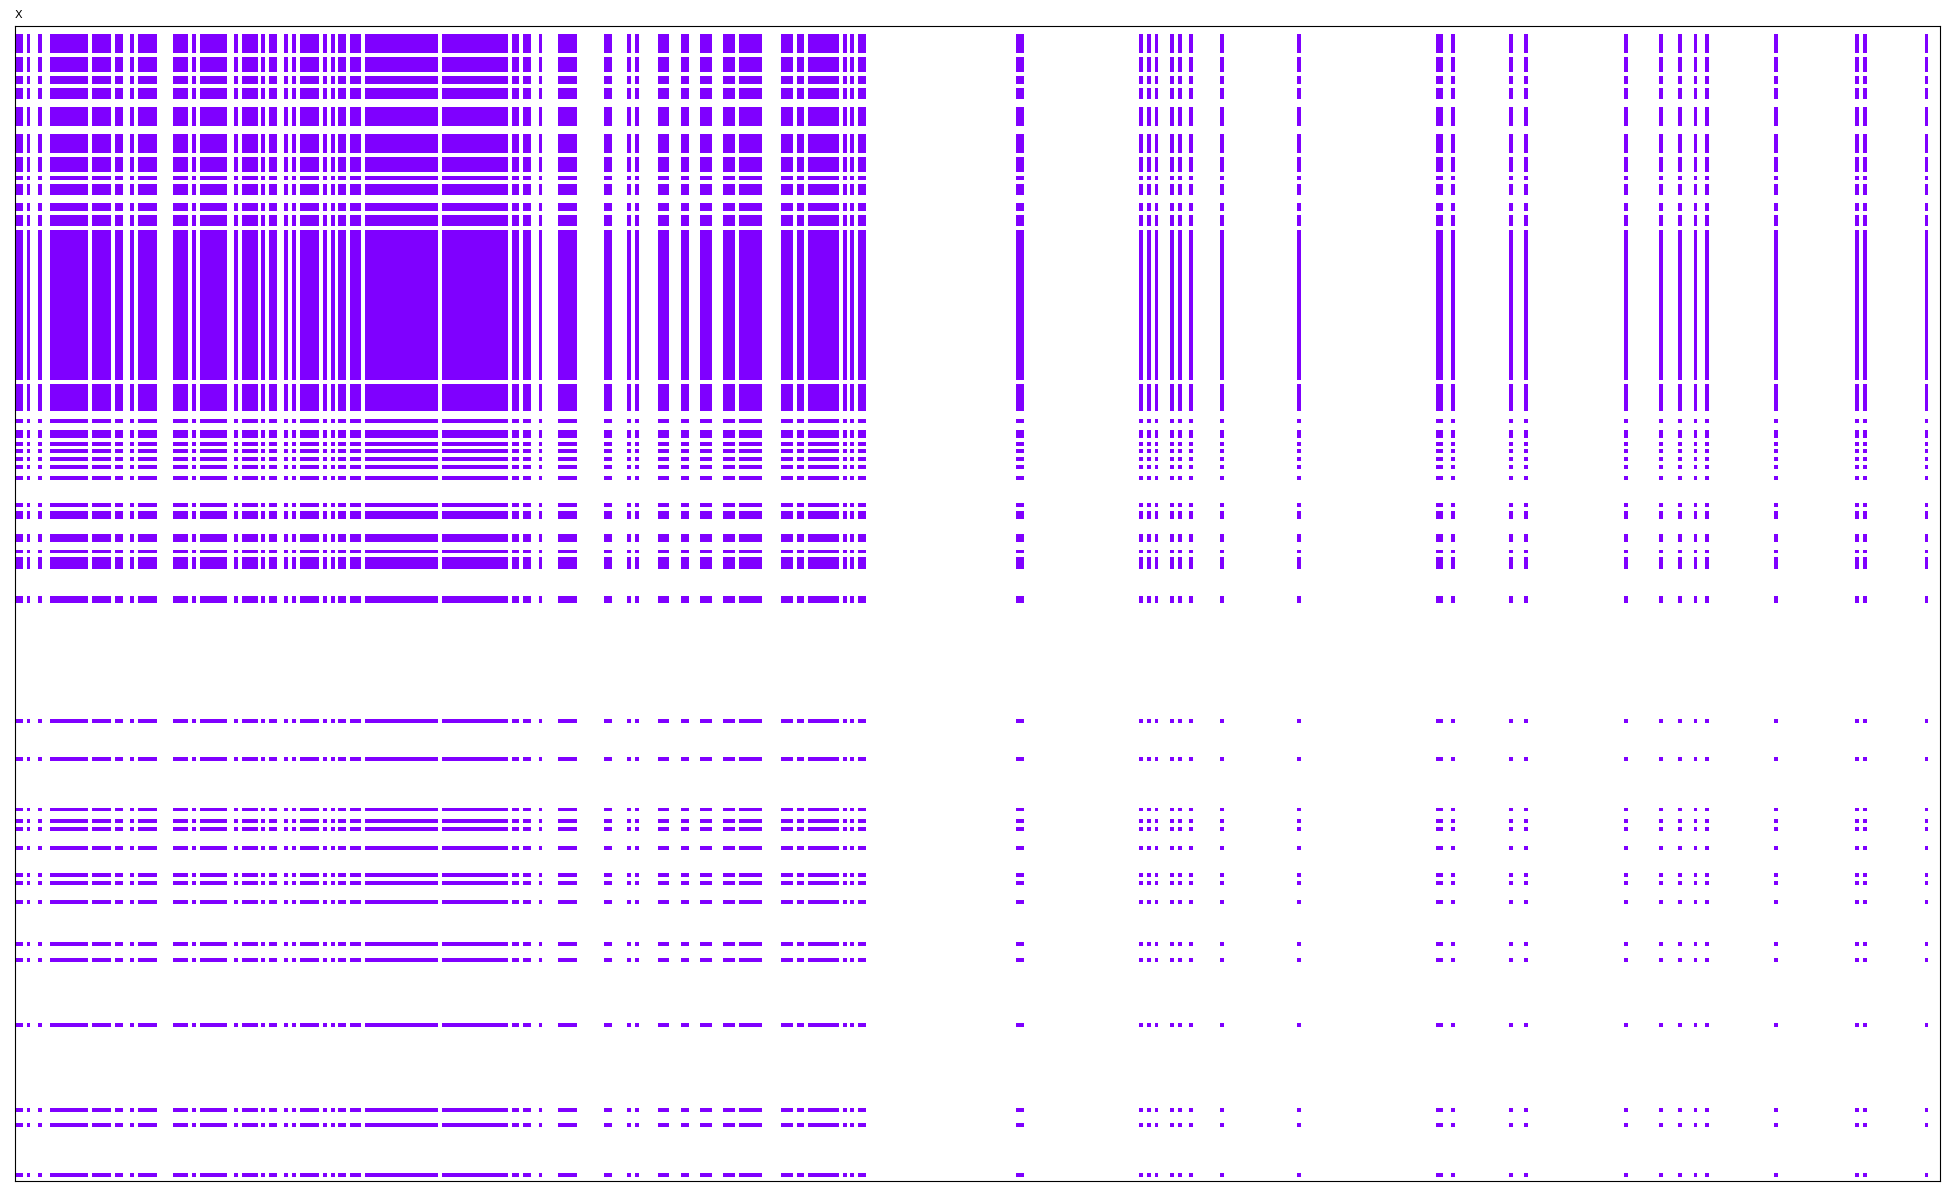

<Figure size 640x480 with 0 Axes>

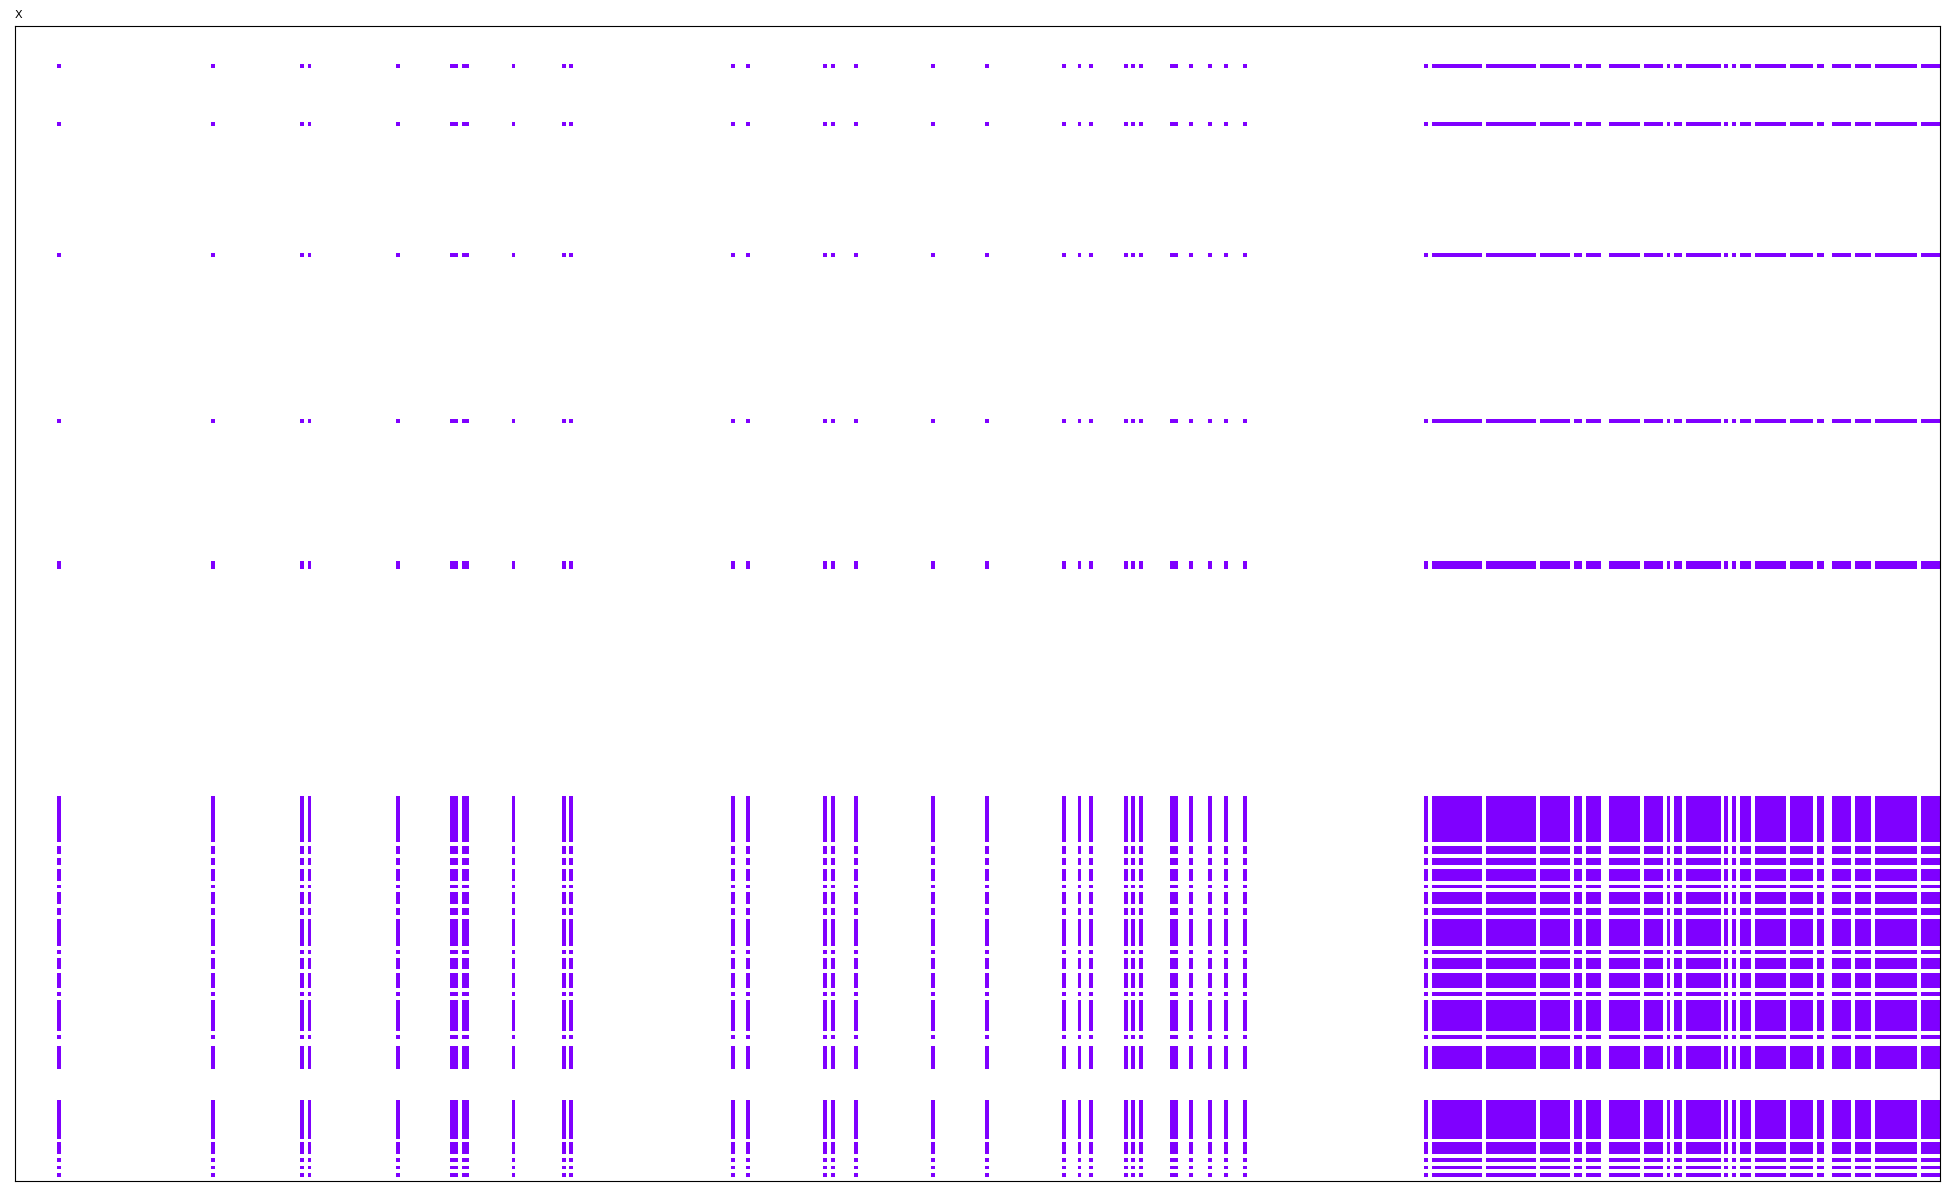

<Figure size 640x480 with 0 Axes>

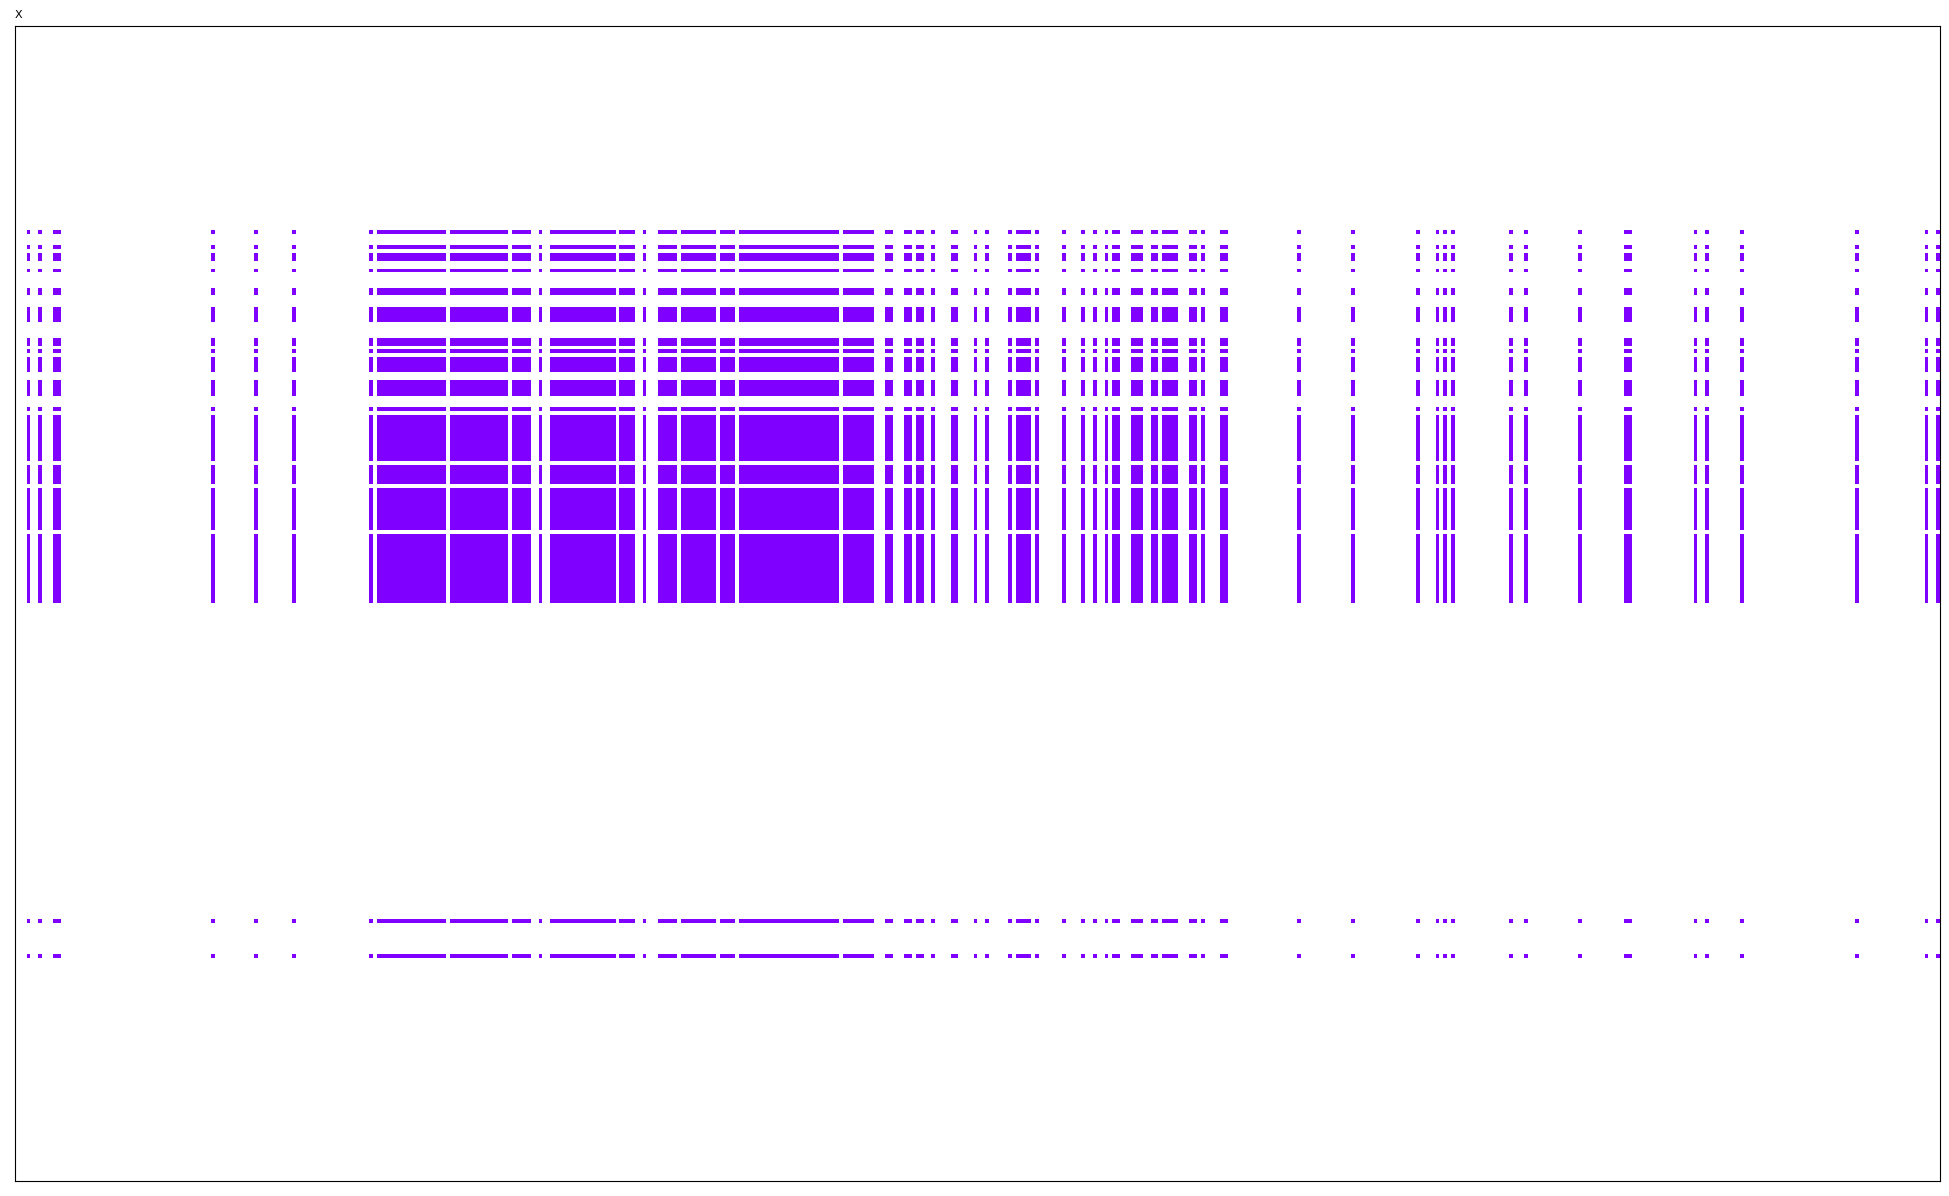

<Figure size 640x480 with 0 Axes>

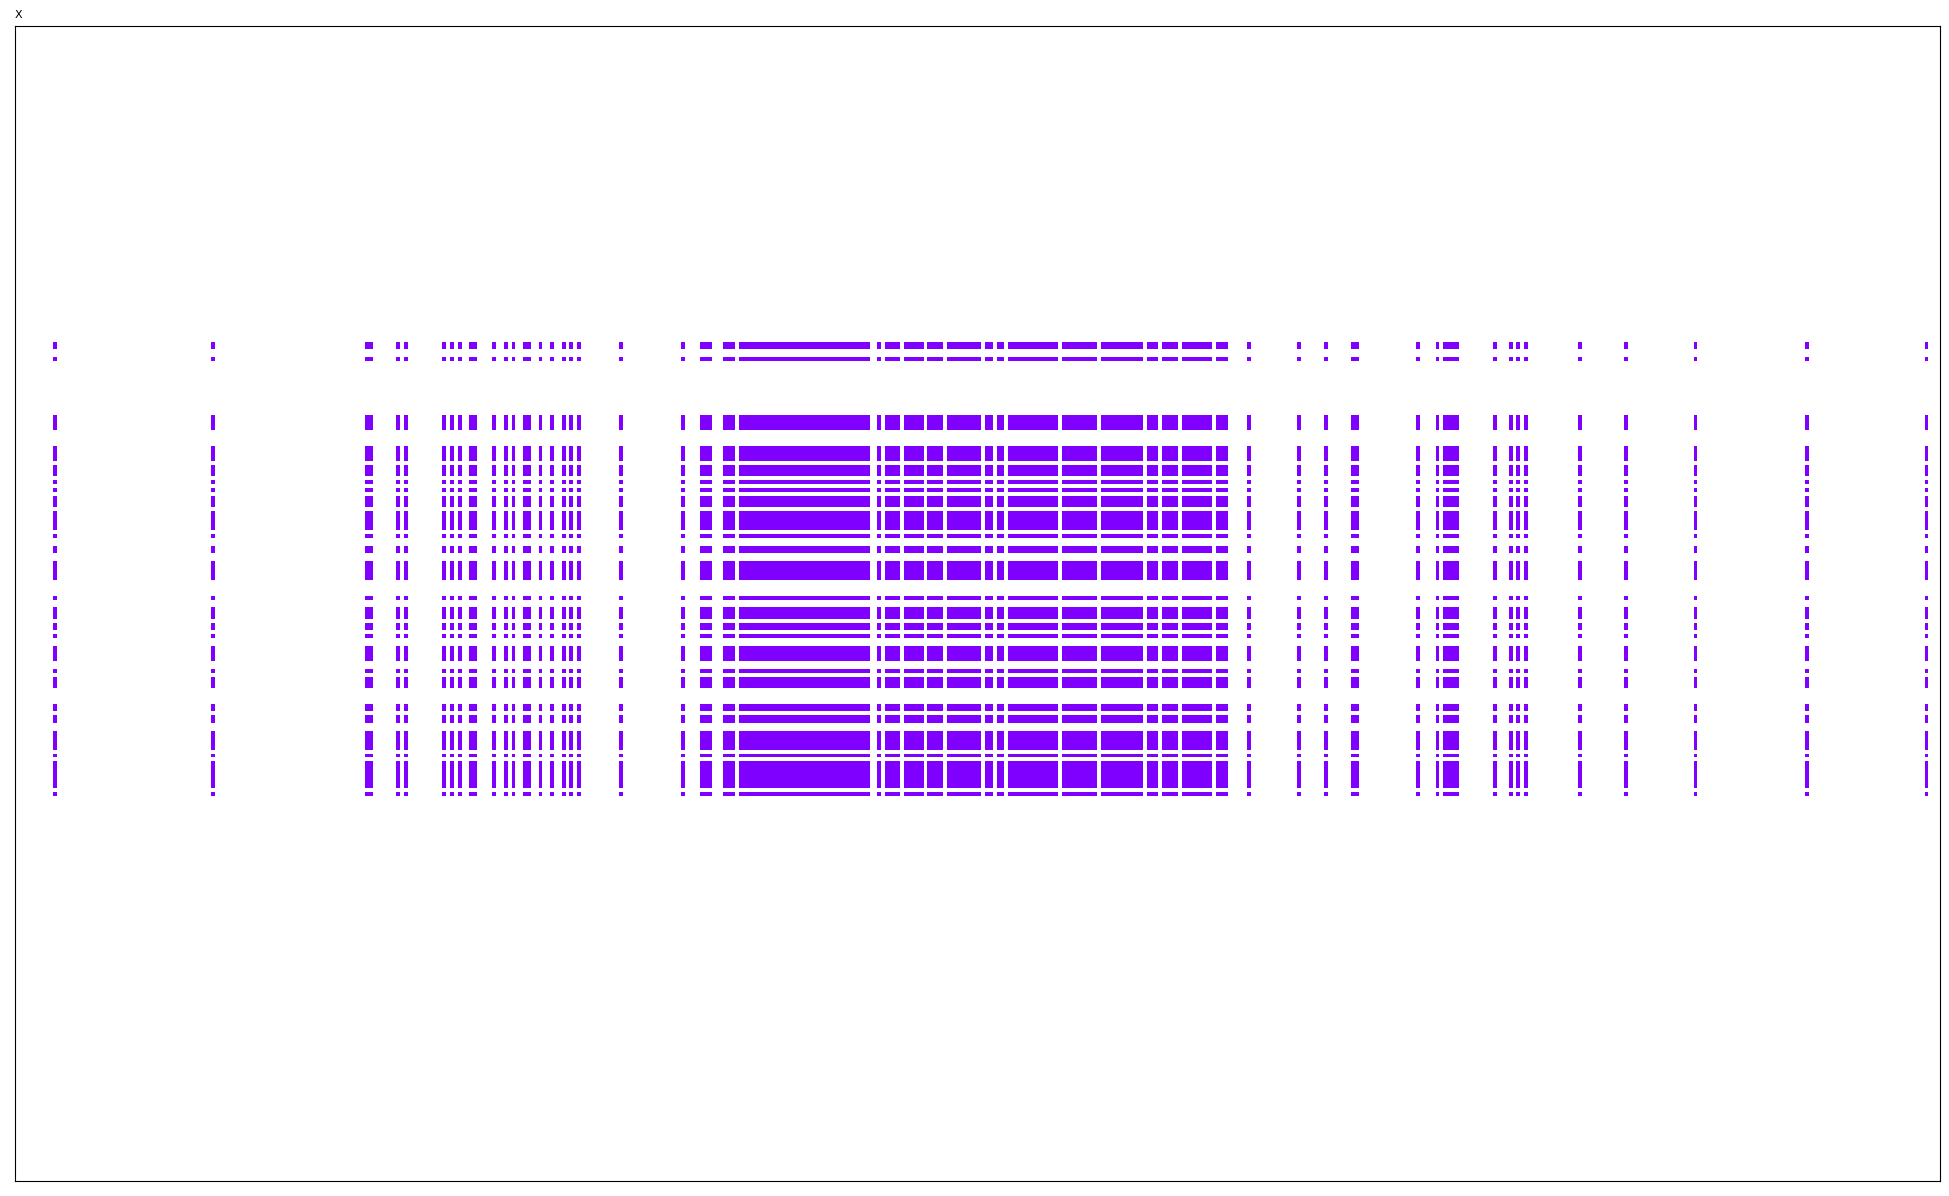

<Figure size 640x480 with 0 Axes>

In [47]:
from utils import matmul

for i in range(model.U.shape[1]):
    X = matmul(model.U[:, i], model.V[:, i].T, boolean=True, sparse=True)
    show_matrix([(X, [0, 0], 'X')])

In [44]:
def rank_matrix_by_row(matrix):
    ranked_matrix = np.zeros_like(matrix)
    for i in range(matrix.shape[0]):
        ranked_matrix[i, :] = np.argsort(np.argsort(matrix[i, :])) + 1
    return ranked_matrix

# # Example usage:
# matrix = np.array([[0.1, 0.3, 0.2], [0.7, 0.9, 0.6]])
# ranked_matrix = rank_matrix_by_row(matrix)
# print(ranked_matrix)

[[1. 3. 2.]
 [2. 3. 1.]]


In [46]:
# validate matching

Ub, Vb = model.U, model.V # boolean factors

# Uq, Vq = U.copy(), V.copy() # quantized factors

Uq = rank_matrix_by_row(U)
Vq = rank_matrix_by_row(V)

from utils import bool_to_index

j_list = np.arange(U.shape[1])

for i in range(Ub.shape[1]):
    ub, vb = Ub[:, i], Vb[:, i]

    u_idx = bool_to_index(ub)
    v_idx = bool_to_index(vb)

    best_score = 0
    best_j = -1

    for j in j_list:

        u, v = Uq[:, j], Vq[:, j]
        score = u[u_idx].sum() * v[v_idx].sum()
        print(i, j, score)

        if score > best_score:
            best_score = score
            best_j = j

    u, v = Uq[:, best_j], Vq[:, best_j]
        
    matching_score = 



0 0
113582.0
0 1
176943.0
0 2
276048.0
0 3
373320.0
0 4
192249.0
1 0
314703.0
1 1
250660.0
1 2
115644.0
1 3
120423.0
1 4
129648.0
2 0
50693.0
2 1
70848.0
2 2
62608.0
2 3
131040.0
2 4
229779.0
3 0
84912.0
3 1
236880.0
3 2
138444.0
3 3
65121.0
3 4
69394.0
4 0
40710.0
4 1
116909.0
4 2
189370.0
4 3
101850.0
4 4
54766.0
